In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

matplotlib.rcParams["font.size"] = 20
matplotlib.rcParams['figure.figsize'] = [10,5]

# 1 Reading data

In [2]:
df = pd.read_excel('Data.xlsx', engine='openpyxl')

In [3]:
df

,Region,Population,UrbanFraction,Croplands,Pastures,Forests,Infrastructure,GDP,Period_start_date,Period_end_date,...,Rainfall_3,Rainfall_4,Rainfall_5,Rainfall_6,Rainfall_7,Rainfall_8,Rainfall_9,Rainfall_10,Rainfall_11,Surface Area
0,POGE12W9LZSXP5WJW3,37.732,83.9157,47.14,0.41,46.37,0.0,715.631,2000-12-31,2001-12-31,...,32.253947,73.818771,68.619044,112.787424,62.600458,75.989525,94.182514,109.146742,95.080397,701.0
1,8RG9QWGS5GBAMNL,140.421,91.7551,61.20,2.19,14.21,113.0,3177.888,2000-12-31,2001-12-31,...,30.086420,49.432370,51.503247,139.018974,42.533396,57.164453,63.490218,98.843044,82.794856,1792.0
2,63EAJJ8DUUJVJE4ZDJ,97.803,65.9483,49.65,0.98,43.58,0.0,1890.964,2000-12-31,2001-12-31,...,42.422973,95.129829,69.168124,133.254791,63.130823,104.874016,110.103365,111.019402,100.962793,1471.0
3,O4T9KS7K5V9RPZ4HZ0T,237.415,66.8813,36.88,12.47,45.14,27.0,5771.141,2000-12-31,2001-12-31,...,41.108178,94.426271,77.677675,136.021585,84.560072,86.598145,200.464481,170.004341,91.497760,3356.0
4,RBIBP3A6Q20ZYO,245.171,83.0871,14.96,9.08,67.68,199.0,5681.384,2000-12-31,2001-12-31,...,34.124264,83.005816,92.474905,126.521875,59.272176,86.869859,146.930711,134.677247,92.355751,3368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21427,H3KQSF3DF1GC,517.977,85.4314,21.61,30.31,14.04,84.0,24639.138,2020-12-31,2021-01-08,...,26.758073,65.867685,82.868737,108.089757,93.499734,104.550968,206.381569,146.067685,195.666852,6504.0
21428,X38YY1ULFK8VK,96.282,65.8288,2.00,6.89,8.74,0.0,2293.608,2020-12-31,2021-01-08,...,38.880575,76.517715,98.342984,103.959021,75.362660,134.351085,219.949099,164.779730,193.121576,13064.0
21429,6QD6DUDCGYJQ94RM2X,206.447,82.3472,4.84,10.02,19.45,0.0,6349.347,2020-12-31,2021-01-08,...,33.293804,74.993289,108.144682,119.595985,95.344751,118.747316,221.154672,166.529473,202.579708,7939.0
21430,7GL287GWNPOHHC9,99.042,61.2673,0.09,6.16,17.82,0.0,2786.683,2020-12-31,2021-01-08,...,42.681554,92.855450,143.662484,142.226965,116.370590,155.590390,262.256395,215.958315,244.739180,14469.0


In [4]:
# print features
df.columns

Index(['Region', 'Population', 'UrbanFraction', 'Croplands', 'Pastures',
       'Forests', 'Infrastructure', 'GDP', 'Period_start_date',
       'Period_end_date', 'Number_of_floods', 'Previous_period_floods',
       'Geo_max_river_distance', 'Geo_25percentile_river_distance',
       'Geo_50percentile_river_distance', 'Geo_75percentile_river_distance',
       'Average_geo_elevation', 'Average_geo_slope', 'Moisture_0',
       'Moisture_1', 'Moisture_2', 'Moisture_3', 'Moisture_4', 'Moisture_5',
       'Moisture_6', 'Moisture_7', 'Moisture_8', 'Moisture_9', 'Moisture_10',
       'Moisture_11', 'Rainfall_0', 'Rainfall_1', 'Rainfall_2', 'Rainfall_3',
       'Rainfall_4', 'Rainfall_5', 'Rainfall_6', 'Rainfall_7', 'Rainfall_8',
       'Rainfall_9', 'Rainfall_10', 'Rainfall_11', 'Surface Area'],
      dtype='object')

In [5]:
# print relevant feature info
df.describe()

,Population,UrbanFraction,Croplands,Pastures,Forests,Infrastructure,GDP,Number_of_floods,Previous_period_floods,Geo_max_river_distance,...,Rainfall_3,Rainfall_4,Rainfall_5,Rainfall_6,Rainfall_7,Rainfall_8,Rainfall_9,Rainfall_10,Rainfall_11,Surface Area
count,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,...,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,17803.000000
mean,388.079215,83.080663,40.113647,12.333819,25.036835,211.324221,9988.009286,0.052352,0.052398,7950.212103,...,60.704643,78.953884,77.007169,82.339477,81.841750,72.550784,82.870334,91.997233,93.833035,2637.536820
std,434.510049,12.918800,21.668428,13.642578,16.761517,418.667731,15475.772315,0.248298,0.248570,11673.815683,...,34.666290,38.718266,38.318895,44.864629,46.659388,36.576732,42.568268,54.118923,45.001286,3275.162266
min,15.012000,25.764100,0.000000,0.000000,0.000000,0.000000,284.937000,0.000000,0.000000,1793.468521,...,-4.130008,1.415932,0.000000,-0.633704,0.000000,-2.560702,-0.770996,0.000000,2.262447,55.000000
25%,148.279063,76.505400,23.759000,3.037667,9.896000,0.000000,2837.303000,0.000000,0.000000,4673.612599,...,35.878120,50.488421,50.139689,49.119718,47.855336,46.855661,51.683368,54.933636,62.818585,664.000000
50%,273.250400,86.447640,40.220000,7.875000,24.560000,64.800000,5502.525375,0.000000,0.000000,5100.949075,...,54.681789,73.596916,71.147256,78.270104,76.148830,65.972789,77.843953,84.211173,87.955132,1359.000000
75%,495.225100,92.740625,57.130000,16.371500,37.370000,230.000000,10935.642200,0.000000,0.000000,5781.607375,...,80.154434,102.082152,100.164513,113.102853,109.693014,91.593461,106.041108,118.532982,118.434023,3320.000000
max,6424.843000,99.674900,92.300000,85.260000,75.310000,9543.000000,223473.639000,4.000000,4.000000,252936.375132,...,340.397683,301.292631,275.986030,268.141598,299.968785,300.450071,654.236310,415.395514,528.145098,28778.000000


In [6]:
# check if features contain nan
df.isna().sum()

Region                                0
Population                            0
UrbanFraction                         0
Croplands                             0
Pastures                              0
Forests                               0
Infrastructure                        0
GDP                                   0
Period_start_date                     0
Period_end_date                       0
Number_of_floods                      0
Previous_period_floods                0
Geo_max_river_distance                0
Geo_25percentile_river_distance       0
Geo_50percentile_river_distance       0
Geo_75percentile_river_distance       0
Average_geo_elevation                 0
Average_geo_slope                     0
Moisture_0                            0
Moisture_1                            0
Moisture_2                            0
Moisture_3                            0
Moisture_4                            0
Moisture_5                            0
Moisture_6                            0


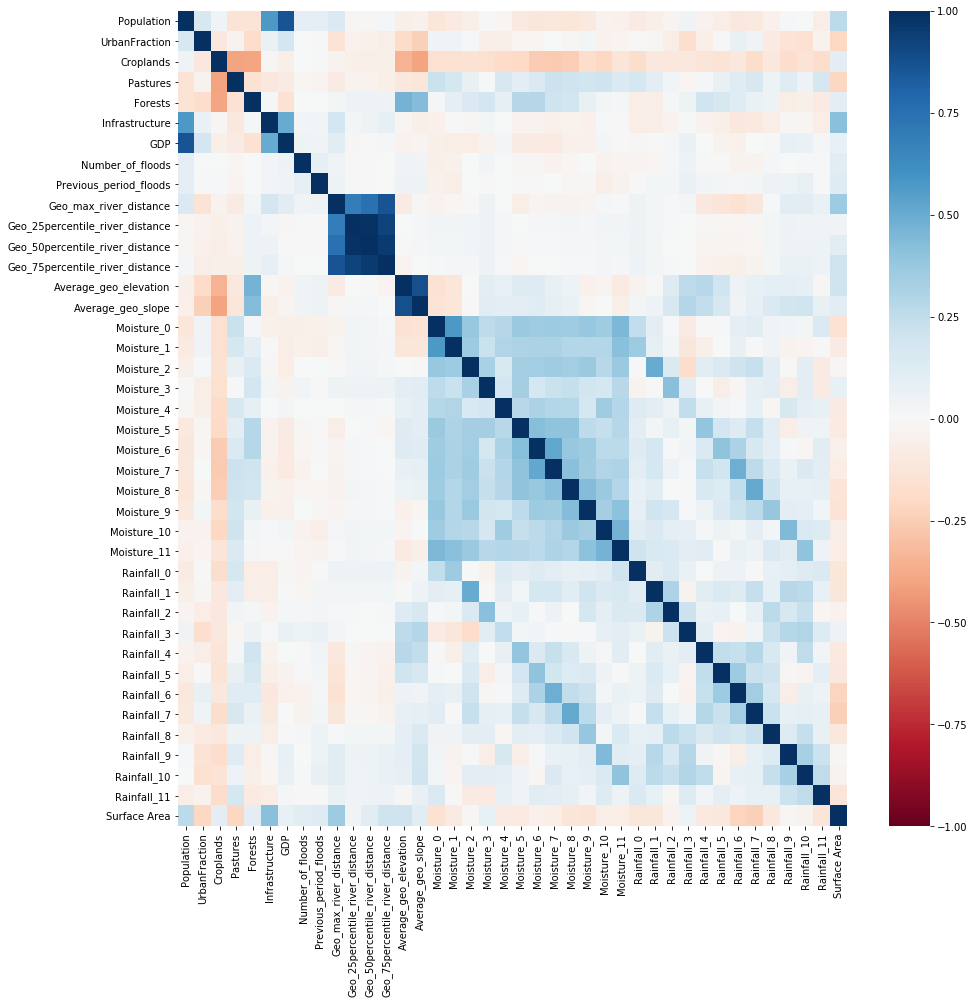

In [7]:
# heatmap provides immediate feeling of feature correlations
matplotlib.rcParams["font.size"] = 10
plt.figure(figsize= (15 , 15))
sns.heatmap(df.corr(),cmap="RdBu", vmin=-1)
plt.show()

# 2 Feature Engineering

## 2.1 Consistency Checks

Let us make a consistency check. For instance, the sum of the forest, pasture and copland percentage should not exceed 100 

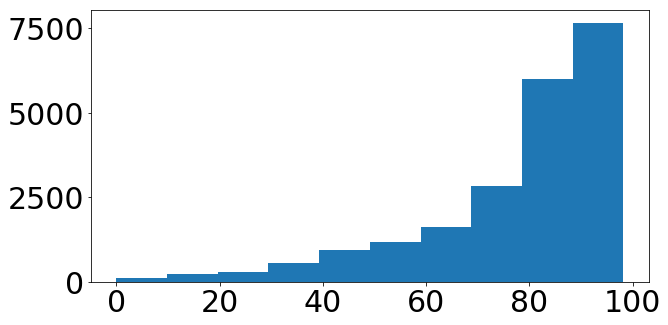

In [8]:
matplotlib.rcParams["font.size"] = 30
plt.figure(figsize=(10, 5))

plt.hist(df['Forests']+df['Pastures']+df['Croplands'])

plt.show()

## 2.2 Encoding Categorical Feature

The only categorical feature is _Region_. Let us encode it into numerical values

In [9]:
from sklearn.preprocessing import LabelEncoder

df['Region'] = LabelEncoder().fit_transform(df['Region'].values.ravel())

## 2.3 Handling Missing Values

The only feature with missing values is _Surface Area_. We can use an iterative imputer to estimate the missing values, in case we want to use this feature later. To choose the features usable for the estimation, let us investigate further the correlations of _Surface Area_ with some promising features. Such promising features are selected from the heatmap. Let us make scatter plots of such features with _Surface Area_

Correlations with Surface Area:
	UrbanFraction: -0.21
	Croplands: 0.11
	Pastures: -0.22
	Forests: 0.11
	Infrastructure: 0.42
	Population: 0.27
	Geo_max_river_distance: 0.36


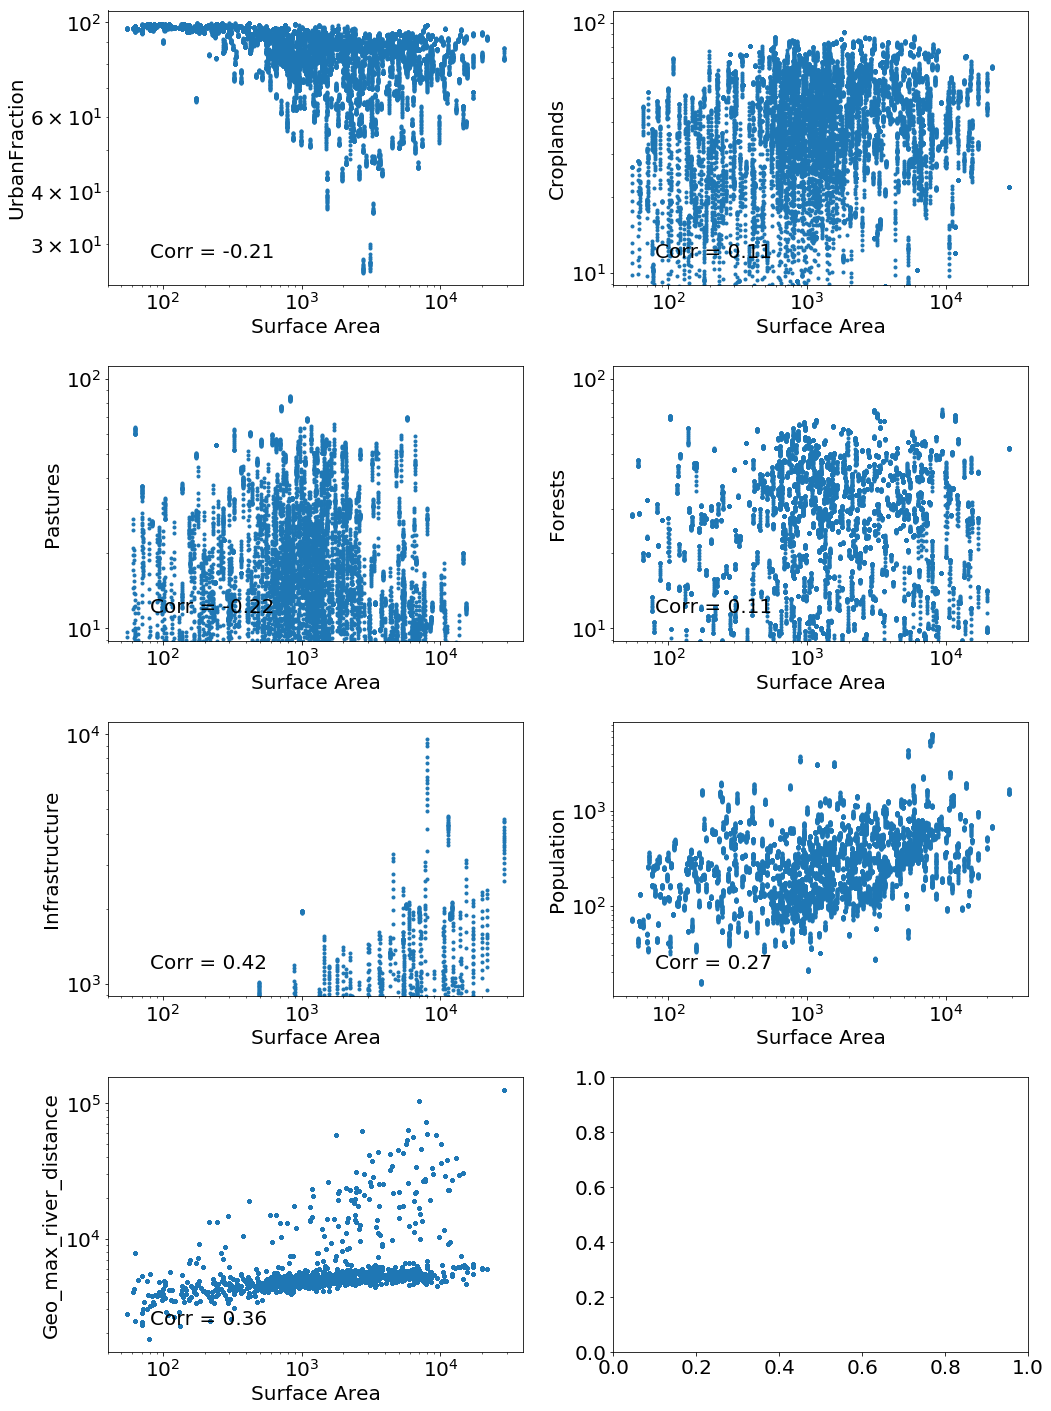

In [10]:
matplotlib.rcParams["font.size"] = 20
nrows, ncols = 4, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

promising_features = ['UrbanFraction', 'Croplands', 'Pastures',
                     'Forests', 'Infrastructure', 'Population', 'Geo_max_river_distance']

var1 = df.dropna(subset=['Surface Area'])['Surface Area']
print('Correlations with Surface Area:')
for ifeat, feat in enumerate(promising_features):
    # find row and column of subplots
    row = int(ifeat/ncols)
    col = ifeat%ncols
    # make scatter plot
    var2 = df.dropna(subset=['Surface Area'])[feat]
    axs[row, col].scatter(var1, var2, marker='.')
    # calculate correlation
    axs[row, col].text(0.1, 0.1, 'Corr = {:.2f}'.format(pearsonr(var1, var2)[0]), transform=axs[row, col].transAxes)
    print('\t'+feat+': {:.2f}'.format(pearsonr(var1, var2)[0]))
    # plot style
    axs[row, col].set_xscale('log')
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel('Surface Area')
    axs[row, col].set_ylabel(feat)
plt.tight_layout()
plt.show()

Based on the correlations and scatter plots above, we use _UrbanFraction_, _Infrastructure_, _Population_, and _Geo_max_river_distance_ to estimate the missing values of _Surface Area_ with an _IterativeImputer_ method

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_feat = ['UrbanFraction', 'Infrastructure', 'Population', 'Geo_max_river_distance', 'Surface Area']
df_imputed = pd.DataFrame(
        IterativeImputer().fit_transform(df[imp_feat]),
        columns = imp_feat
    )

In [12]:
df['Surface Area'] = df_imputed['Surface Area']

## 2.4 New Feature Definition

We now define new features that we will use for the training of the model. Notably, we will replace all the moisture and rainfall values with the average and the maximum, and we will use the GDP per capita instead of the GDP and population

In [13]:
def add_average(data, feat):
    """
    calculate the average of moisture or rainfall and add it to the
    database. If the average was already added, skip the process
    
    input:
        data (DataFrame): the database containing the variables to average
        feat (str): name of the feature (moisture or rainfall)
    """
    if feat not in ['Moisture', 'Rainfall']:
        print('Cannot calculate average of feature '+feat+'. Check spelling')
    elif feat+'_avg' not in data.columns:
        data[feat+'_avg'] = data.apply(lambda row : np.average([row[feat+'_0'],
                                                    row[feat+'_1'],
                                                    row[feat+'_2'],
                                                    row[feat+'_3'],
                                                    row[feat+'_4'],
                                                    row[feat+'_5'],
                                                    row[feat+'_6'],
                                                    row[feat+'_7'],
                                                    row[feat+'_8'],
                                                    row[feat+'_9'],
                                                    row[feat+'_10'],
                                                    row[feat+'_11']]
                                                   ), axis=1)
    else: print(feat+'_avg already added')

def add_max(data, feat):
    """
    calculate the average of moisture or rainfall and add it to the
    database. If the average was already added, skip the process
    
    input:
        data (DataFrame): the database containing the variables to average
        feat (str): name of the feature (moisture or rainfall)
    """
    if feat not in ['Moisture', 'Rainfall']:
        print('Cannot calculate maximum of feature '+feat+'. Check spelling')
    elif feat+'_max' not in data.columns:
        data[feat+'_max'] = data.apply(lambda row : np.max([row[feat+'_0'],
                                                    row[feat+'_1'],
                                                    row[feat+'_2'],
                                                    row[feat+'_3'],
                                                    row[feat+'_4'],
                                                    row[feat+'_5'],
                                                    row[feat+'_6'],
                                                    row[feat+'_7'],
                                                    row[feat+'_8'],
                                                    row[feat+'_9'],
                                                    row[feat+'_10'],
                                                    row[feat+'_11']]
                                                   ), axis=1)
    else: print(feat+'_avg already added')

for feat in ['Moisture', 'Rainfall']:
    add_average(df, feat)
    add_max(df, feat)
    
df['GDP_per_capita'] = df['GDP']/df['Population']

## 2.5 Target Feature

### 2.5.1 Definition

Our model will estimate if a flood will occur or not during the current year. We will build a classification model with a binary target feature named _floods_occur_ , that is 0 if no floods occur, and 1 if floods occur

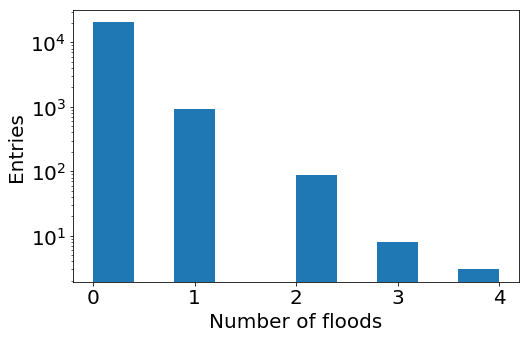

In [14]:
plt.figure(figsize=(8, 5))

plt.hist(df['Number_of_floods'])
plt.yscale('log')
plt.xlabel('Number of floods')
plt.ylabel('Entries')

plt.show()

In [15]:
df['floods_occur'] = df.apply(lambda row : 0 if row['Number_of_floods']==0 else 1, axis=1)

We separate the target feature (y) from the rest of the features (X) in the database

In [16]:
X = df.drop(['Number_of_floods', 'floods_occur'], axis=1)
y = df['floods_occur']

### 2.5.2 Dealing with Imbalanced Data

We notice that the target feature is imbalanced, as most of the cases involve no floods

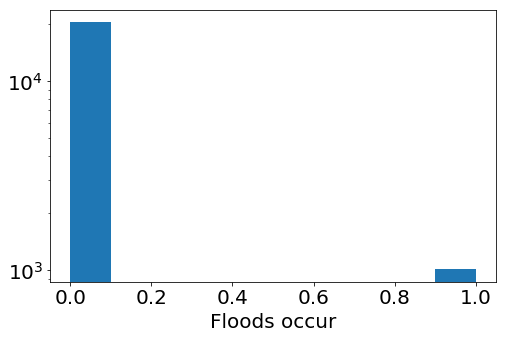

In [17]:
plt.figure(figsize=(8,5))
plt.hist(y)
plt.yscale('log')
plt.xlabel('Floods occur')
plt.show()

To avoid a bad behaviour of the algorithm, we produce pseudo-realization of the dataset in order to balance the two events:

In [18]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
X, y = oversample.fit_resample(X.drop(['Period_start_date', 'Period_end_date'], axis=1), y.ravel())

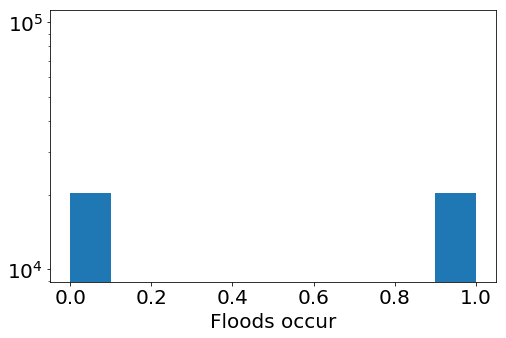

In [19]:
plt.figure(figsize=(8,5))
plt.hist(y)
plt.yscale('log')
plt.xlabel('Floods occur')
plt.show()

# 3 Feature Visualization

We inspect the features that might be useful for the model training

First, we show boxplots of some features with respect to the target feature _floods_occur_ . For these features, we also calculate the correlation

Correlations with target feature:
	UrbanFraction: 0.01
	Croplands: 0.02
	Pastures: -0.05
	Forests: 0.02
	GDP: 0.11
	Infrastructure: 0.06
	Rainfall_avg: -0.02
	Rainfall_max: -0.00
	Moisture_avg: -0.07
	Moisture_max: -0.10
	Population: 0.19
	Previous_period_floods: 0.01
	Geo_max_river_distance: 0.11
	Average_geo_elevation: 0.10
	Average_geo_slope: 0.11
	GDP_per_capita: -0.10
	Surface Area: 0.21


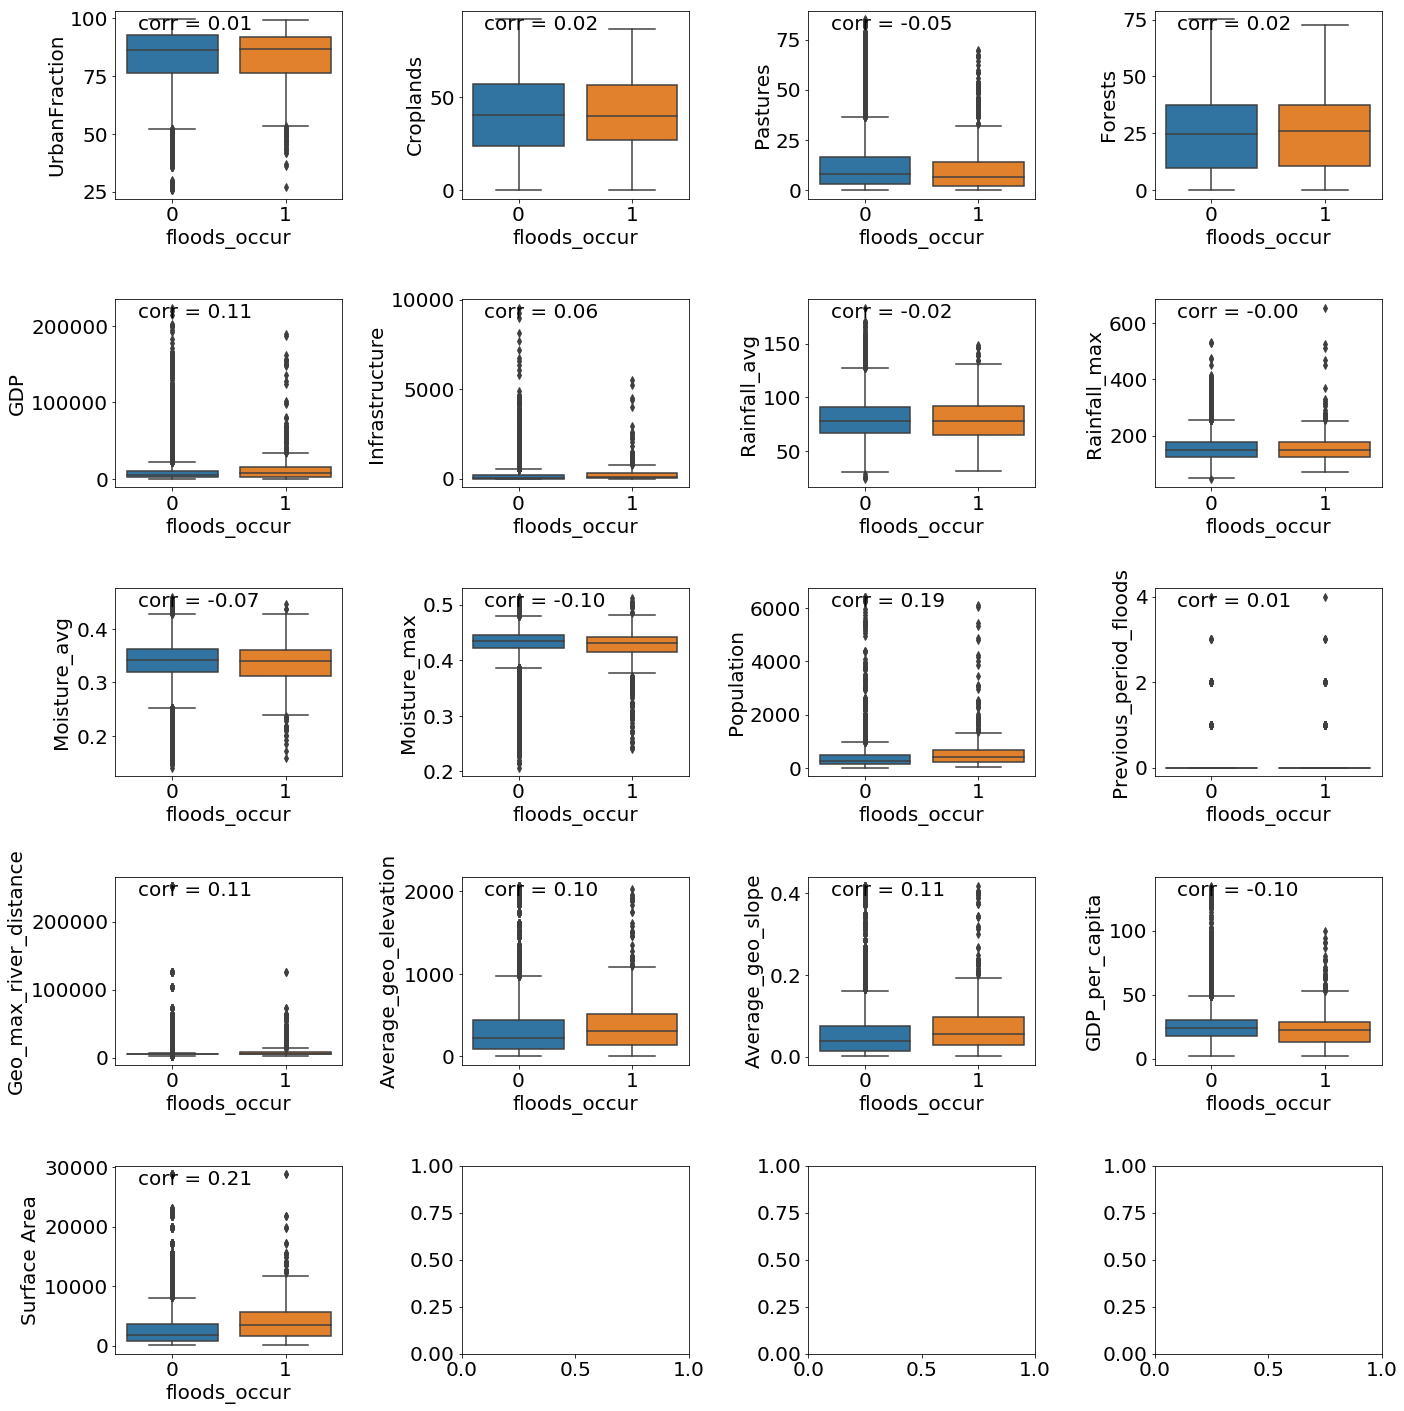

In [20]:
matplotlib.rcParams["font.size"] = 20
nrows, ncols = 5, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

selected_features = ['UrbanFraction', 'Croplands', 'Pastures', 'Forests', 'GDP',
             'Infrastructure', 'Rainfall_avg', 'Rainfall_max', 'Moisture_avg', 'Moisture_max',
             'Population', 'Previous_period_floods', 'Geo_max_river_distance',
             'Average_geo_elevation', 'Average_geo_slope', 'GDP_per_capita', 'Surface Area'
            ]

print('Correlations with target feature:')
for ifeat, feat in enumerate(selected_features):
    # find row and column of subplots
    row = int(ifeat/ncols)
    col = ifeat%ncols
    # make boxplot
    sns.boxplot(data=df, x='floods_occur', y=feat, ax=axs[row, col])
    # calculate correlation
    axs[row, col].text(0.1, 0.9, 'corr = {:.2f}'.format(pearsonr(X[feat], y)[0]), transform=axs[row, col].transAxes)
    print('\t'+feat+': {:.2f}'.format(pearsonr(X[feat], y)[0]))

plt.tight_layout()
plt.show()

In the following block, we show the distributions of these features. We also calcualte the skewness, that provides a feeling of the asymmetry

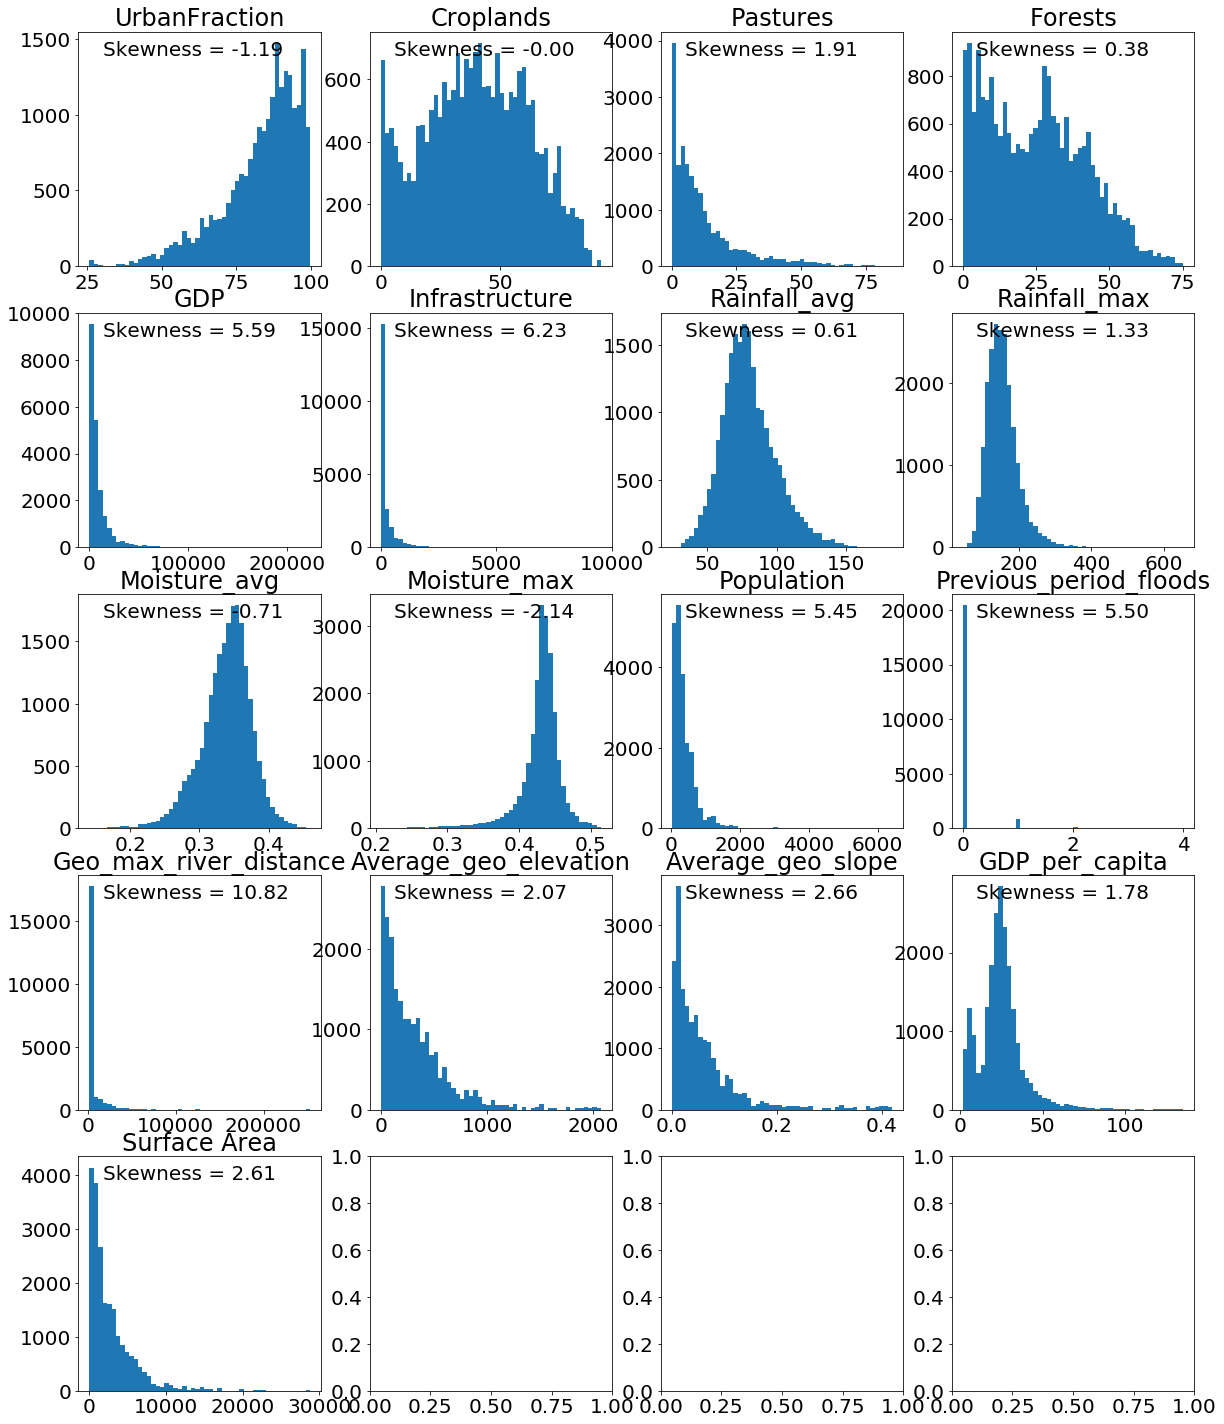

In [21]:
matplotlib.rcParams["font.size"] = 20
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25)) #nrow, ncols defined in previous block

skew = []
for ifeat, feat in enumerate(selected_features): #selected_features defined in previous block
    # find row and column of subplots
    row = int(ifeat/ncols)
    col = ifeat%ncols
    # plot histogram of feat
    axs[row, col].hist(df[feat], bins=50)
    # calculate skewness
    skew.append(df[feat].skew())
    axs[row, col].text(0.1, 0.9, 'Skewness = {:.2f}'.format(skew[-1]), transform=axs[row, col].transAxes)
    axs[row, col].set_title(feat)
plt.tight_layout
plt.show()

## 3.1 Feature Selection

We define the features to be used for the training of the model

In [22]:
X = X[['UrbanFraction', 'Croplands', 'Pastures', 'Forests',
             'Infrastructure', 'Rainfall_avg', 'Rainfall_max', 'Moisture_avg', 'Moisture_max',
             'Previous_period_floods', 'Geo_max_river_distance', 'Geo_25percentile_river_distance',
             'Average_geo_elevation', 'Average_geo_slope', 'GDP_per_capita', 'Surface Area']]

## 3.2 Feature Symmetrization

As most of the features are asymmetric, we symmetrize them by applying a log1p function on the features that have skewness larger than 1 in absolute value

In [23]:
X = X.apply(lambda row: np.log1p(row) if np.abs(row.skew())>1 else row)